# Question 5


### Question 5.1 
 Using all of the data for training, display the selected feature component j, threshold c, andlass label C1 of the decision stump ht(x) used in each of the first 10 boosting iterations (t = 1, 2, ..., 10).

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [37]:
#Load dataset 
data = pd.read_csv('bupa.data', header=None, names = ['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt', 'drinks', 'selector'])
data

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,2
2,86,54,33,16,54,0.0,2
3,91,78,34,24,36,0.0,2
4,87,70,12,28,10,0.0,2
...,...,...,...,...,...,...,...
340,99,75,26,24,41,12.0,1
341,96,69,53,43,203,12.0,2
342,98,77,55,35,89,15.0,1
343,91,68,27,26,14,16.0,1


In [38]:
#Split into training and testing sets 
features = ['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt', 'drinks']
x= data[features]
y=data['selector']

x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y)

In [39]:
#Implmenting AdaBoost using a decision stump 
n = len(x_train)
d = np.ones(n)/n
a = []
stumps = []


for i in range(10): #boosting iterations 
    #find best stump
    errors = []
    for j in range(x_train.shape[1]):
        for value in np.unique(x_train.iloc[:,j]):
            prediction = np.ones(n)
            prediction[x_train.iloc[:,j]<value] = -1
            error = np.sum(d[y_train != prediction])
            errors.append((j,value,error))
    j,value,error = min(errors, key=lambda x:x[2])
    prediction = np.ones(len(x_train))
    prediction[x_train.iloc[:,j]<value] = -1
    error_rate = error / np.sum(d)
    a.append(0.5 * np.log((1 - error_rate) / error_rate))
    stumps.append((j,value))

    #update weights 
    d *= np.exp(-a[i]*y_train*prediction)
    d /= np.sum(d) 

for i in range(10):
    j, value = stumps[i]
    if value <= x_train.iloc[:,j].median():
        c1 = 1
    else:
        c1 = -1
    print(f"Iteration {i+1}: j={j}, c={value}, C1={c1}")

Iteration 1: j=0, c=65, C1=1
Iteration 2: j=0, c=65, C1=1
Iteration 3: j=0, c=65, C1=1
Iteration 4: j=0, c=65, C1=1
Iteration 5: j=0, c=65, C1=1
Iteration 6: j=0, c=65, C1=1
Iteration 7: j=0, c=65, C1=1
Iteration 8: j=0, c=65, C1=1
Iteration 9: j=0, c=65, C1=1
Iteration 10: j=0, c=65, C1=1


In [48]:
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

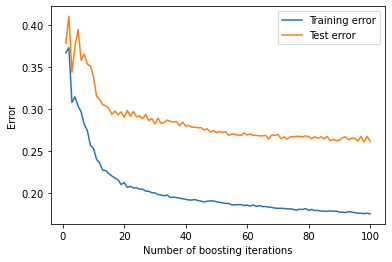

In [53]:
features = ['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt', 'drinks']
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# AdaBoost model
model = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    algorithm='SAMME')

# declare the number of splits and iterations
num_splits = 50
num_iterations = 100

# Initialize arrays to store the errors
train_errors = np.zeros((num_iterations,))
test_errors = np.zeros((num_iterations,))

# iterate over the splits
for i in range(num_splits):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
    # Train the AdaBoost on the training set
    model.fit(x_train, y_train)
    # Compute the training error after each iteration
    for j, y_pred_train in enumerate(model.staged_predict(x_train)):
        train_errors[j] += np.mean(y_pred_train != y_train) / num_splits
    
    # Compute the test error after each  iteration
    for j, y_pred_test in enumerate(model.staged_predict(x_test)):
        test_errors[j] += np.mean(y_pred_test != y_test) / num_splits

# Plot the errors 
plt.plot(np.arange(num_iterations) + 1, train_errors, label='Training error')
plt.plot(np.arange(num_iterations) + 1, test_errors, label='Test error')
plt.xlabel('Number of boosting iterations')
plt.ylabel('Error')
plt.legend()
plt.show()